In [74]:
import pandas as pd

In [75]:
data=pd.read_csv("abalone_original.csv")

In [76]:
data

,sex,length,diameter,height,whole-weight,shucked-weight,viscera-weight,shell-weight,rings
0,M,91,73,19,102.8,44.9,20.2,30.0,15
1,M,70,53,18,45.1,19.9,9.7,14.0,7
2,F,106,84,27,135.4,51.3,28.3,42.0,9
3,M,88,73,25,103.2,43.1,22.8,31.0,10
4,I,66,51,16,41.0,17.9,7.9,11.0,7
...,...,...,...,...,...,...,...,...,...
4172,F,113,90,33,177.4,74.0,47.8,49.8,11
4173,M,118,88,27,193.2,87.8,42.9,52.1,10
4174,M,120,95,41,235.2,105.1,57.5,61.6,9
4175,F,125,97,30,218.9,106.2,52.2,59.2,10


In [77]:
data['sex']=pd.get_dummies(data['sex'],drop_first=True)

In [78]:
data

,sex,length,diameter,height,whole-weight,shucked-weight,viscera-weight,shell-weight,rings
0,0,91,73,19,102.8,44.9,20.2,30.0,15
1,0,70,53,18,45.1,19.9,9.7,14.0,7
2,0,106,84,27,135.4,51.3,28.3,42.0,9
3,0,88,73,25,103.2,43.1,22.8,31.0,10
4,1,66,51,16,41.0,17.9,7.9,11.0,7
...,...,...,...,...,...,...,...,...,...
4172,0,113,90,33,177.4,74.0,47.8,49.8,11
4173,0,118,88,27,193.2,87.8,42.9,52.1,10
4174,0,120,95,41,235.2,105.1,57.5,61.6,9
4175,0,125,97,30,218.9,106.2,52.2,59.2,10


In [79]:
x=data.iloc[:,0:8]
y=data['rings']

In [80]:
x

,sex,length,diameter,height,whole-weight,shucked-weight,viscera-weight,shell-weight
0,0,91,73,19,102.8,44.9,20.2,30.0
1,0,70,53,18,45.1,19.9,9.7,14.0
2,0,106,84,27,135.4,51.3,28.3,42.0
3,0,88,73,25,103.2,43.1,22.8,31.0
4,1,66,51,16,41.0,17.9,7.9,11.0
...,...,...,...,...,...,...,...,...
4172,0,113,90,33,177.4,74.0,47.8,49.8
4173,0,118,88,27,193.2,87.8,42.9,52.1
4174,0,120,95,41,235.2,105.1,57.5,61.6
4175,0,125,97,30,218.9,106.2,52.2,59.2


In [81]:
y

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: rings, Length: 4177, dtype: int64

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [83]:
y_test

668     13
1580     8
3784    11
463      5
2615    12
        ..
575     11
3231    12
1084     7
290     17
2713     4
Name: rings, Length: 836, dtype: int64

In [84]:
y_train

3141     5
3521     3
883     15
3627    10
2106    14
        ..
1033    10
3264    12
1653    10
2607     9
2732     8
Name: rings, Length: 3341, dtype: int64

In [85]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Now we have to convert my data into tensors with Float data type

In [86]:
import torch
import torch.nn as nn
import numpy as np
import torch.nn.functional as F

In [87]:
X_train=torch.FloatTensor(X_train)
X_test=torch.FloatTensor(X_test)

In [88]:
X_train[0]

tensor([ 1.4761, -2.8886, -2.7757, -1.4109, -1.6309, -1.5576, -1.5894, -1.6550])

In [89]:
y_train=torch.tensor(np.asarray(y_train))
y_test=torch.tensor(np.asarray(y_test))

In [90]:
y_train[0]

tensor(5)

In [91]:
y_test

tensor([13,  8, 11,  5, 12, 11,  7,  8,  7,  9,  8,  8, 11,  9,  4,  7,  7, 17,
         7,  7,  7,  5,  8,  9, 10, 10,  5, 15, 10, 14,  8,  4,  9, 13,  7,  7,
         8,  9,  8, 11, 15, 12, 17, 16, 11, 11,  8, 10, 11,  6, 13,  7, 13, 20,
        12,  7,  8, 10,  7,  7,  9,  9, 11,  8,  7, 12, 13, 17,  8, 12,  9, 17,
        10,  6, 11,  8,  8,  9,  8,  8,  8,  6,  7, 13, 11,  6,  9, 12,  5,  6,
        11, 11,  8,  7, 16,  8, 11,  8, 18, 11, 12, 14, 12, 11,  6,  9,  7,  6,
        11, 11, 11, 12, 20, 10, 14, 10, 10, 12,  4, 12,  7, 13,  6,  8, 17, 15,
         9, 11,  7, 11,  8,  7,  7, 10, 11,  9, 10,  9,  8, 16, 16, 13,  6,  9,
        10,  9,  8,  8,  8,  5,  8, 11,  5,  9,  9,  6,  8,  7, 10, 11, 12,  8,
         9, 10,  5, 16,  7,  6, 15,  9, 10,  3,  6, 10, 11, 12,  5,  8,  5, 13,
         9, 11,  7,  9, 15,  8, 10,  8,  5,  9, 19,  9,  8,  9, 11,  9,  9,  9,
         5, 15, 10, 14, 12,  8, 12, 11,  5, 10, 11, 23,  4, 11, 11, 10,  9,  9,
         9,  8,  5, 13, 12, 14,  8, 11, 

In [92]:
class ANN(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = torch.nn.Linear(8,15)
        self.fc2 = torch.nn.Linear(15,11)
        self.fc3= torch.nn.Linear(11,12)
        self.output=torch.nn.Linear(12,1)
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x= F.relu(self.fc3(x))
        x=self.output(x)
        return x

In [93]:
Neural_Network=ANN()

In [94]:
loss_function=nn.L1Loss()
optimizer=torch.optim.Adam(Neural_Network.parameters(),lr=0.01)

In [95]:
list_of_loss=[]

In [96]:
for i in range(0,450):
    y_pred=Neural_Network.forward(X_train)
    loss=loss_function(y_pred,y_train)
    list_of_loss.append(loss)
    print("Epoch number {} loss {}".format(i,loss.item()))
    optimizer.zero_grad()  ## Initially our derivative will be 0
    loss.backward()        ## Do the first propagation
    optimizer.step()        ## Performs a single optimization step

c:\users\harsh\anaconda3\envs\pytorch2\lib\site-packages\torch\nn\modules\loss.py:94: UserWarning: Using a target size (torch.Size([3341])) that is different to the input size (torch.Size([3341, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


Epoch number 0 loss 9.854811668395996
Epoch number 1 loss 9.799509048461914
Epoch number 2 loss 9.755167961120605
Epoch number 3 loss 9.718158721923828
Epoch number 4 loss 9.689135551452637
Epoch number 5 loss 9.663607597351074
Epoch number 6 loss 9.63931655883789
Epoch number 7 loss 9.616044998168945
Epoch number 8 loss 9.592818260192871
Epoch number 9 loss 9.569989204406738
Epoch number 10 loss 9.5457124710083
Epoch number 11 loss 9.518674850463867
Epoch number 12 loss 9.488134384155273
Epoch number 13 loss 9.453228950500488
Epoch number 14 loss 9.413569450378418
Epoch number 15 loss 9.368321418762207
Epoch number 16 loss 9.316280364990234
Epoch number 17 loss 9.255934715270996
Epoch number 18 loss 9.185319900512695
Epoch number 19 loss 9.10239315032959
Epoch number 20 loss 9.005403518676758
Epoch number 21 loss 8.89206600189209
Epoch number 22 loss 8.759207725524902
Epoch number 23 loss 8.601811408996582
Epoch number 24 loss 8.415044784545898
Epoch number 25 loss 8.193143844604492
E

Epoch number 206 loss 2.338918685913086
Epoch number 207 loss 2.338904857635498
Epoch number 208 loss 2.3388900756835938
Epoch number 209 loss 2.338874578475952
Epoch number 210 loss 2.3388593196868896
Epoch number 211 loss 2.3388447761535645
Epoch number 212 loss 2.3388302326202393
Epoch number 213 loss 2.3388171195983887
Epoch number 214 loss 2.338803291320801
Epoch number 215 loss 2.33879017829895
Epoch number 216 loss 2.3387768268585205
Epoch number 217 loss 2.33876371383667
Epoch number 218 loss 2.3387503623962402
Epoch number 219 loss 2.338736057281494
Epoch number 220 loss 2.3387222290039062
Epoch number 221 loss 2.338707447052002
Epoch number 222 loss 2.338693141937256
Epoch number 223 loss 2.338679790496826
Epoch number 224 loss 2.3386693000793457
Epoch number 225 loss 2.338658094406128
Epoch number 226 loss 2.338646650314331
Epoch number 227 loss 2.338634967803955
Epoch number 228 loss 2.338622808456421
Epoch number 229 loss 2.3386101722717285
Epoch number 230 loss 2.33859705

Epoch number 409 loss 2.3374223709106445
Epoch number 410 loss 2.3374135494232178
Epoch number 411 loss 2.3374264240264893
Epoch number 412 loss 2.3374102115631104
Epoch number 413 loss 2.337409257888794
Epoch number 414 loss 2.3374016284942627
Epoch number 415 loss 2.337390422821045
Epoch number 416 loss 2.3373875617980957
Epoch number 417 loss 2.3373799324035645
Epoch number 418 loss 2.337378740310669
Epoch number 419 loss 2.3373806476593018
Epoch number 420 loss 2.3373732566833496
Epoch number 421 loss 2.337376594543457
Epoch number 422 loss 2.337369441986084
Epoch number 423 loss 2.337367057800293
Epoch number 424 loss 2.3373639583587646
Epoch number 425 loss 2.3373544216156006
Epoch number 426 loss 2.3373498916625977
Epoch number 427 loss 2.3373537063598633
Epoch number 428 loss 2.3373498916625977
Epoch number 429 loss 2.3373444080352783
Epoch number 430 loss 2.337343454360962
Epoch number 431 loss 2.337337017059326
Epoch number 432 loss 2.3373358249664307
Epoch number 433 loss 2.

In [97]:
import matplotlib.pyplot as plt

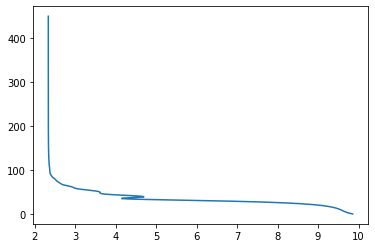

In [98]:
plt.plot(list_of_loss,range(0,450))

In [99]:
# torch.no_grad() tells PyTorch that we do not want to perform back-propagation,

In [100]:
torch.save(Neural_Network,"first_model.pt")

In [101]:
torch.load("first_model.pt")

ANN(
  (fc1): Linear(in_features=8, out_features=15, bias=True)
  (fc2): Linear(in_features=15, out_features=11, bias=True)
  (fc3): Linear(in_features=11, out_features=12, bias=True)
  (output): Linear(in_features=12, out_features=1, bias=True)
)

In [113]:
point1=sc.transform([[0,125,97,30,218.9,106.2,52.2,59.]])

In [119]:
point2=torch.FloatTensor(point1)

In [120]:
with torch.no_grad():
    print(Neural_Network(point2))

tensor([[9.7982]])
